In [ ]:
from data_processing import *

: 

In [ ]:
import os
print(os.getcwd())

: 

In [3]:
import os

# Перейти на диск H:
os.chdir('H:\\')

# Проверить текущий рабочий каталог
print(os.getcwd())

H:\


In [4]:
!chcp 65001
%cd Мой диск"
%ls

Active code page: 65001
H:\Мой диск
 Volume in drive H is sanyasmirnov09051998@gmail.co...
 Volume Serial Number is 1983-1116

 Directory of H:\Мой диск

31.07.2023  15:30    <DIR>          .
31.07.2023  15:30    <DIR>          ..
08.07.2023  14:13    <DIR>          .ipynb_checkpoints
31.07.2023  09:12    <DIR>          AI
22.08.2021  19:51    <DIR>          Colab Notebooks
08.07.2023  14:14    <DIR>          Docs
26.10.2016  14:13    <DIR>          Google Фото
31.07.2023  07:22       417 498 570 new_data2.csv
               1 File(s)    417 498 570 bytes
               7 Dir(s)   4 379 938 816 bytes free


In [7]:
# Shared link of the 'new_data2.csv' file on Google Drive
file_url = r"H:\Мой диск\new_data2.csv"

# Read the CSV file from the URL and create a DataFrame
new_data = pd.read_csv(file_url).sample(n=1500000)

print(new_data.shape)

(1500000, 19)


In [8]:
new_data.head()

,session_id,client_id,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_city,event_action,visit_hour,part_of_day,day_of_week,is_weekend,visit_counts_by_source,preferred_utm_source
1634675,7860603916475703280.1637099717.1637099717,1830189469.1637097456,Very Low,ZpYIoDJMcFzVoPFsHGJL,smartbanner,jqlUOdZBNZYfInQVcZlS,EteMoEECGsaJeMnuvAZD,mobile,Samsung,412x915,Chrome,Moscow,0,0,Night,2,0,3,ZpYIoDJMcFzVoPFsHGJL
1389837,6796535801928771632.1630693682.1630693682,1582441805.163056,Very Low,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Xiaomi,393x818,Chrome,(not set),0,21,Evening,4,0,2,kjsLglQLzykiRbcDiGcD
1469550,7147666373554620872.1622821320.1622821320,1664195762.162282,Very Low,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,414x896,YaBrowser,Nizhny Novgorod,0,18,Afternoon,4,0,2,fDLlAcSmythWSCVMvqvL
722738,3902015431131403080.1622032689.1622032689,908508764.162202,Very Low,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Xiaomi,360x640,Chrome,Yekaterinburg,0,15,Afternoon,2,0,5,fDLlAcSmythWSCVMvqvL
1612288,7761284726180810772.1621889045.1621889045,1807064918.1621888,Very Low,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,414x896,Safari,Moscow,0,23,Evening,0,0,1,fDLlAcSmythWSCVMvqvL


In [9]:
X = new_data.drop(['session_id', 'client_id', 'event_action'], axis=1)
y = new_data[['event_action']]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [10]:
columns = ['utm_source',
           'utm_medium',
           'utm_campaign',
           'utm_adcontent',
           'device_category',
           'device_brand',
           'device_screen_resolution',
           'device_browser',
           'geo_city']

In [11]:
class ProbabilityEncoder:
    """
    Класс для кодирования категориальных переменных путем вычисления и добавления вероятности целевого события.

    Параметры:
    columns (list): Список столбцов для кодирования. Если None, будут использоваться все столбцы.
    target (str): Имя столбца целевой переменной. Если None, будет использоваться последний столбец.
    id_column (str): Имя столбца идентификатора. Если None, будет использоваться первый столбец.

    Атрибуты:
    percentage_dicts (dict): Словари, содержащие вычисленные вероятности для каждого столбца.
    """
    def __init__(self, columns=None, target=None, id_column=None):
        self.columns = columns
        self.target = target
        self.id_column = id_column
        self.percentage_dicts = {}

    def fit(self, data):
        """
        Вычисляет вероятности целевого события для каждого уникального значения в выбранных столбцах.
        """
        data = data.copy()
        self.columns = self.columns if self.columns else data.columns.tolist()
        self.id_column = self.id_column if self.id_column else data.columns[0]
        self.target = self.target if self.target else data.columns[-1]

        for column in self.columns:
            total_counts = data.groupby(column)[self.target].count()
            positive_counts = data.groupby(column)[self.target].sum()
            percentages = (positive_counts / total_counts) * 100
            self.percentage_dicts[column] = percentages.to_dict()

        return self

    def transform(self, data):
        """
        Преобразует выбранные столбцы в соответствии с вычисленными вероятностями.
        """
        data = data.copy()
        for column, percentages in self.percentage_dicts.items():
            data[column] = data[column].map(percentages).fillna(0)

        return data

    def fit_transform(self, data):
        """
        Вычисляет вероятности и преобразует выбранные столбцы в одном шаге.
        """
        self.fit(data)
        return self.transform(data)

In [15]:
prob_encoder = ProbabilityEncoder(columns=columns, target='event_action', id_column='client_id')

In [17]:
# Добавляем целевой столбец обратно в X_train перед fit_transform
X_train_with_target = X_train.copy()
X_train_with_target['event_action'] = y_train

# Обучаем encoder на обучающих данных и преобразуем их
X_train_encoded = prob_encoder.fit_transform(X_train_with_target)

# Удаляем целевой столбец
X_train_encoded = X_train_encoded.drop('event_action', axis=1)

In [18]:
X_test_encoded = prob_encoder.transform(X_test)

In [19]:
# Создание экземпляра класса
preprocessor = DataPreprocessor()

In [21]:
# Обучение преобразований на обучающих данных
preprocessor.fit(X_train_encoded)

In [22]:
# Применение обученных преобразований к обучающим и тестовым данным
X_train_transformed = preprocessor.transform(X_train_encoded)
X_test_transformed = preprocessor.transform(X_test_encoded)

In [23]:
class ModelTrainer:
    def __init__(self, task_type='regression', balance=False, models=None, n_jobs=-1):
        """
        Initialize the ModelTrainer.

        :param task_type: The type of task ('regression' or 'classification').
        :param balance: Boolean value indicating whether to use class balancing for classification tasks.
        :param models: List of model names to use. If None, all available models will be used.
        :param n_jobs: Number of CPU cores to use for parallel processing (if supported by models).
        """
        self.task_type = task_type
        self.balance = balance
        self.n_jobs = n_jobs
        self.models = self._get_models(models)
        self.trained_models = {}
        self.score_func = mean_squared_error if task_type == 'regression' else roc_auc_score
        if self.balance:
            self.sampler = SMOTE()

    def _get_models(self, models):
        regression_models = {
            'LinearRegression': LinearRegression(),
            'RandomForestRegressor': RandomForestRegressor(n_jobs=self.n_jobs),
            'GradientBoostingRegressor': GradientBoostingRegressor(),
            'CatBoostRegressor': CatBoostRegressor(silent=True)
        }

        classification_models = {
            'LogisticRegression': LogisticRegression(),
            'RandomForestClassifier': RandomForestClassifier(n_jobs=self.n_jobs),
            'GradientBoostingClassifier': GradientBoostingClassifier(),
            'CatBoostClassifier': CatBoostClassifier(silent=True),
            'LGBMClassifier': LGBMClassifier(n_jobs=self.n_jobs)
        }

        models_dict = classification_models if self.task_type == 'classification' else regression_models
        models = models_dict.keys() if models is None else [model for model in models if model in models_dict]
        return [models_dict[model_name] for model_name in models]

    def train_and_evaluate(self, X_train, y_train, X_test, y_test):
        """
        Train and evaluate the models using the provided data.

        :param X_train: Training data features.
        :param y_train: Training data labels.
        :param X_test: Test data features.
        :param y_test: Test data labels.
        :return: The best model and a dictionary of all trained models.
        """
        best_model, best_score = None, -float('inf')
        for model in self.models:
            try:
                if self.balance and self.task_type == 'classification':
                    X_train, y_train = self._apply_balance_strategy(model, X_train, y_train)
                model.fit(X_train, y_train)
                score = self._evaluate(model, X_test, y_test)
                self.trained_models[type(model).__name__] = model
                if score > best_score:
                    best_model, best_score = model, score
            except NotFittedError as e:
                print(f"Model {type(model).__name__} could not be fitted. Error: {str(e)}")
        print(f"\nBest model: {type(best_model).__name__}, with Score: {best_score}")
        return best_model, self.trained_models

    def _apply_balance_strategy(self, model, X_train, y_train):
        balance_strategies = {
            LogisticRegression: lambda x, y: (x, y, {'class_weight': 'balanced'}),
            RandomForestClassifier: lambda x, y: (x, y, {'class_weight': 'balanced'}),
            LGBMClassifier: lambda x, y: (x, y, {'class_weight': 'balanced'}),
            GradientBoostingClassifier: lambda x, y: (*self.sampler.fit_resample(x, y), {}),
            CatBoostClassifier: lambda x, y: (*self.sampler.fit_resample(x, y), {})
        }
        strategy = balance_strategies.get(type(model), lambda x, y: (x, y, {}))
        X_train, y_train, params = strategy(X_train, y_train)
        model.set_params(**params)
        return X_train, y_train

    def _evaluate(self, model, X_test, y_test):
        """
        Evaluate the model using the appropriate scoring function.

        :param model: The model to be evaluated.
        :param X_test: Test data features.
        :param y_test: Test data labels.
        :return: The evaluation score.
        """
        y_pred = model.predict(X_test)
        model_name = type(model).__name__

        if model_name == 'LogisticRegression':
            score_func = roc_auc_score
        else:
            score_func = self.score_func

        score = score_func(y_test, y_pred)
        metric_name = 'ROC_AUC' if model_name == 'LogisticRegression' else 'MSE' if self.task_type == 'regression' else 'Unknown Metric'
        print(f"Model: {model_name}, {metric_name}: {score}")
        return score

In [24]:
trainer = ModelTrainer(task_type='classification', balance=True,  n_jobs=-1)

In [25]:
best_model, trained_models = trainer.train_and_evaluate(X_train_transformed, y_train, X_test_transformed, y_test)

Model: LogisticRegression, ROC_AUC: 0.6224318123124811
Model: RandomForestClassifier, Unknown Metric: 0.5154509220213606
Model: GradientBoostingClassifier, Unknown Metric: 0.7660623065582917
Model: CatBoostClassifier, Unknown Metric: 0.5177129730718235
[LightGBM] [Info] Number of positive: 1022206, number of negative: 1022206
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.558871 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8055
[LightGBM] [Info] Number of data points in the train set: 2044412, number of used features: 164
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Model: LGBMClassifier, Unknown Metric: 0.5560397523902211

Best model: GradientBoostingClassifier, with Score: 0.7660623065582917


In [26]:
import joblib

# Сохраняем модели
for model_name, model in trained_models.items():
    joblib.dump(model, f"{model_name}.joblib")

In [35]:
def plot_model(X_test, y_test, model=None, visualize=True):
    y_pred = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(f"\nROC AUC Score:\n{roc_auc}")
    df_classification_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()

    if visualize:
        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
        plt.title("Confusion Matrix")
        plt.xlabel("Predicted class")
        plt.ylabel("True class")
        plt.show()

        fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
        plt.figure()
        plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show()
    else:
        print(f"\nConfusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

    print("\nClassification Report:")
    display(df_classification_report)
    print(f"{'=='*40}\n")

    return roc_auc

Results for LogisticRegression:

ROC AUC Score:
0.6224318123124811


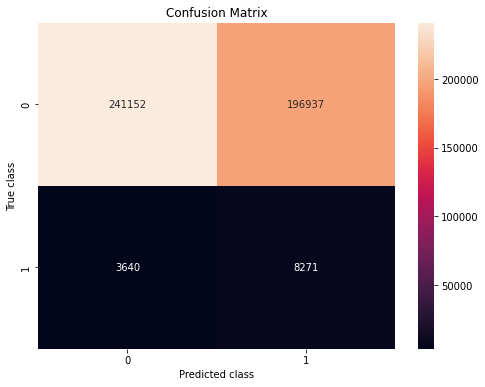

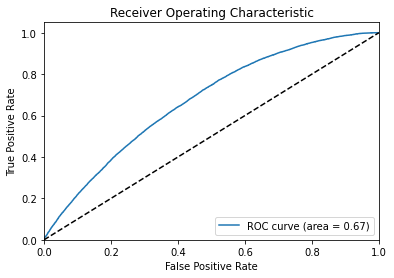


Classification Report:


,precision,recall,f1-score,support
0,0.985130,0.550463,0.706278,438089.000000
1,0.040305,0.694400,0.076189,11911.000000
accuracy,0.554273,0.554273,0.554273,0.554273
macro avg,0.512718,0.622432,0.391233,450000.000000
weighted avg,0.960122,0.554273,0.689600,450000.000000



Results for RandomForestClassifier:

ROC AUC Score:
0.5154509220213606


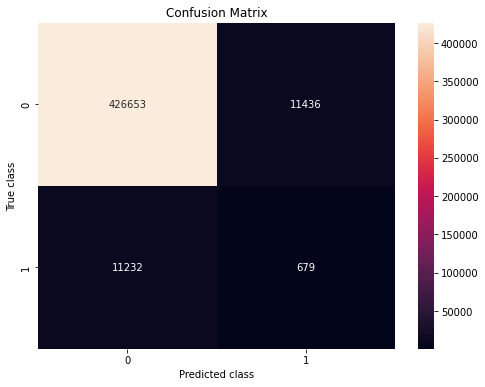

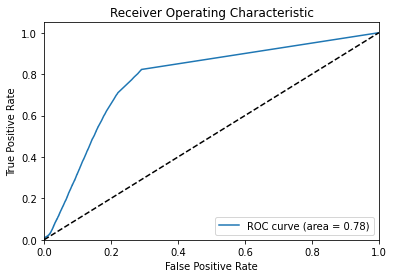


Classification Report:


,precision,recall,f1-score,support
0,0.974349,0.973896,0.974123,438089.000000
1,0.056046,0.057006,0.056522,11911.000000
accuracy,0.949627,0.949627,0.949627,0.949627
macro avg,0.515198,0.515451,0.515322,450000.000000
weighted avg,0.950043,0.949627,0.949835,450000.000000



Results for GradientBoostingClassifier:

ROC AUC Score:
0.7660623065582917


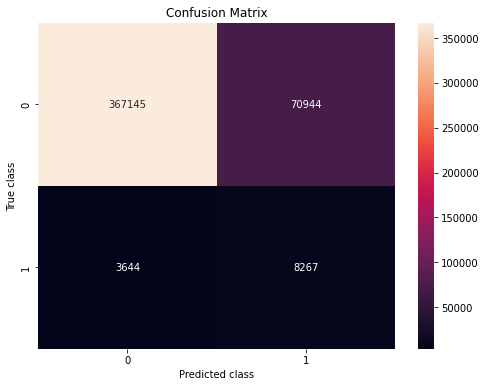

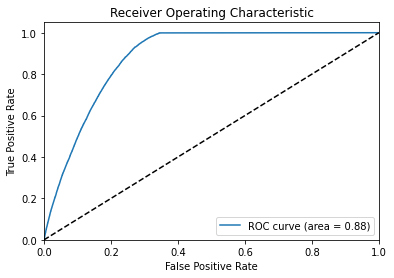


Classification Report:


,precision,recall,f1-score,support
0,0.990172,0.838060,0.907788,438089.000000
1,0.104367,0.694064,0.181449,11911.000000
accuracy,0.834249,0.834249,0.834249,0.834249
macro avg,0.547270,0.766062,0.544619,450000.000000
weighted avg,0.966726,0.834249,0.888563,450000.000000



Results for CatBoostClassifier:

ROC AUC Score:
0.5177129730718235


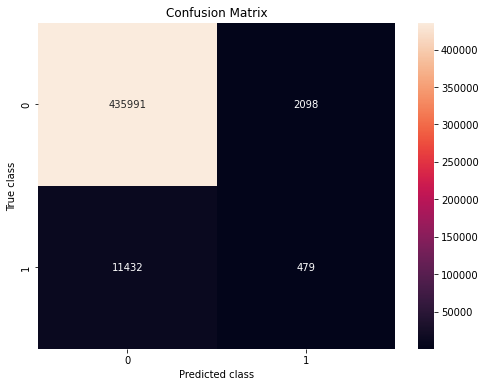

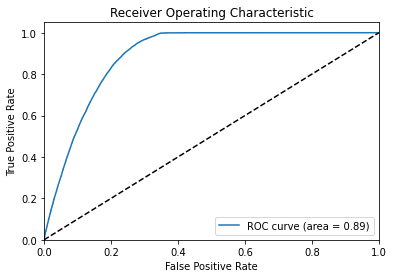


Classification Report:


,precision,recall,f1-score,support
0,0.974449,0.995211,0.984721,438089.000000
1,0.185875,0.040215,0.066124,11911.000000
accuracy,0.969933,0.969933,0.969933,0.969933
macro avg,0.580162,0.517713,0.525422,450000.000000
weighted avg,0.953577,0.969933,0.960406,450000.000000



Results for LGBMClassifier:

ROC AUC Score:
0.5560397523902211


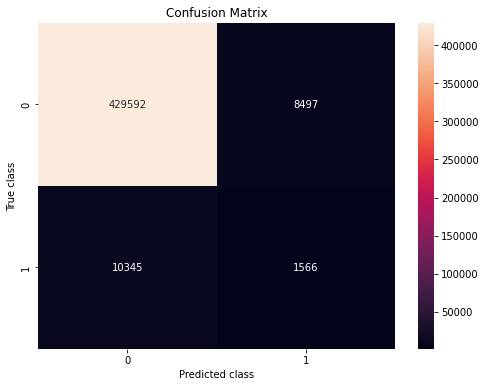

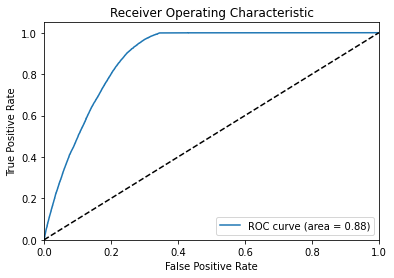


Classification Report:


,precision,recall,f1-score,support
0,0.976485,0.980604,0.978540,438089.000000
1,0.155620,0.131475,0.142532,11911.000000
accuracy,0.958129,0.958129,0.958129,0.958129
macro avg,0.566052,0.556040,0.560536,450000.000000
weighted avg,0.954758,0.958129,0.956412,450000.000000


In [36]:
for model_name, model in trained_models.items():
    print(f"Results for {model_name}:")
    plot_model(X_test_transformed, y_test, model=model, visualize=True)

In [37]:
def print_feature_importances(models, X):
    feature_names = X.columns
    
    for name, model in models.items():
        if name == "LogisticRegression":
            print(f"Модель {name} исключена.")
            continue

        try:
            importances = model.feature_importances_
        except AttributeError:
            print(f"Модель {name} не поддерживает вычисление важности признаков.")
            continue

        if len(importances) != len(feature_names):
            print(f"Количество признаков для модели {name} не совпадает с количеством значений важности.")
            continue
        
        importance_series = pd.Series(importances, index=feature_names)
        sorted_importances = importance_series.sort_values(ascending=False)

        print(f"Feature importances for {name}:")
        print(sorted_importances)
        print("\n")

    
# Предположим, что у нас есть словарь обученных моделей 'trained_models' и исходный DataFrame 'X_train'
print_feature_importances(trained_models, X_train)

Модель LogisticRegression исключена.
Количество признаков для модели RandomForestClassifier не совпадает с количеством значений важности.
Количество признаков для модели GradientBoostingClassifier не совпадает с количеством значений важности.
Количество признаков для модели CatBoostClassifier не совпадает с количеством значений важности.
Количество признаков для модели LGBMClassifier не совпадает с количеством значений важности.


In [53]:
from sklearn.metrics import get_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from catboost import CatBoostRegressor, CatBoostClassifier


class ModelOptimizer:
    def __init__(self, models=None, cv=5, scorer='roc_auc', balance=False, n_jobs=-1):
        self.cv = cv
        self.balance = balance
        self.n_jobs = n_jobs
        self.models = self._get_models(models)
        self.param_grids = self._get_param_grids()
        self.scorer = get_scorer(scorer)

    def _get_models(self, models):
        model_classes = {
            'LinearRegression': LinearRegression(),
            'RandomForestRegressor': RandomForestRegressor(n_jobs=self.n_jobs),
            'GradientBoostingRegressor': GradientBoostingRegressor(),
            'CatBoostRegressor': CatBoostRegressor(),
            'LogisticRegression': LogisticRegression(class_weight='balanced' if self.balance else None, n_jobs=self.n_jobs),
            'RandomForestClassifier': RandomForestClassifier(n_jobs=self.n_jobs),
            'GradientBoostingClassifier': GradientBoostingClassifier(),
            'CatBoostClassifier': CatBoostClassifier(),
            'LGBMClassifier': LGBMClassifier()
        }
        return [model_classes[model] for model in models] if models else [model for model in model_classes.values()]

    def _get_param_grids(self):
        return {
            'RandomForestRegressor': {
                "n_estimators": [100, 200, 300],
                "max_depth": [None, 5, 10],
                "min_samples_split": [2, 5, 10]
            },
            'GradientBoostingRegressor': {
                "n_estimators": [100, 200, 300],
                "learning_rate": [0.01, 0.1, 1.0],
                "subsample": [0.5, 0.7, 1.0],
                "max_depth": [3, 7, 9]
            },
            'CatBoostRegressor': {
                "iterations": [100, 200, 300],
                "learning_rate": [0.01, 0.1, 1.0],
                "depth": [6, 8, 10]
            },
            'LogisticRegression': {
                "C": [0.01, 0.1, 1.0],
                "penalty": ['l1', 'l2']
            },
            'RandomForestClassifier': {
                "n_estimators": [100, 200, 300],
                "max_depth": [None, 5, 10],
                "min_samples_split": [2, 5, 10]
            },
            'GradientBoostingClassifier': {
                "n_estimators": [100, 200, 300],
                "learning_rate": [0.01, 0.1, 1.0],
                "subsample": [0.5, 0.7, 1.0],
                "max_depth": [3, 7, 9]
            },
            'CatBoostClassifier': {
                "iterations": [100, 200, 300],
                "learning_rate": [0.01, 0.1, 1.0],
                "depth": [6, 8, 10]
            },
            'LGBMClassifier': {
                "n_estimators": [100, 200, 300],
                "learning_rate": [0.01, 0.1, 1.0],
                "max_depth": [3, 5, 7]}
        }

    def _is_classification(self):
        return any(isinstance(model, (LogisticRegression, RandomForestClassifier, GradientBoostingClassifier, CatBoostClassifier)) for model in self.models)

    def optimize(self, X_train, y_train):
        self.optimized_models = []  # Создаем пустой список для хранения оптимизированных моделей
        best_score = -1

        for model in self.models:
            model_name = type(model).__name__
            print(f"Optimizing {model_name}...")
            param_grid = self.param_grids.get(model_name, {})
            grid_search = GridSearchCV(model, param_grid, cv=self.cv, scoring=self.scorer, n_jobs=self.n_jobs)
            try:
                grid_search.fit(X_train, y_train)
            except Exception as e:
                print(f"An error occurred while fitting {model_name}: {str(e)}")
                continue
            params = grid_search.best_params_
            score = grid_search.best_score_
            print(f"Best parameters for {model_name}: {params}")
            print(f"Best score for {model_name}: {score}")

            # Добавляем оптимизированную модель и результаты в список
            self.optimized_models.append({"model": grid_search.best_estimator_, "params": params, "score": score})

            if score > best_score:
                self.best_model = grid_search.best_estimator_
                best_score = score

        return self.optimized_models


    def evaluate(self, X_test, y_test, models):
        for model in models:
            y_pred = model.predict(X_test)
            score = self.scorer(y_test, y_pred if self._is_classification() else y_pred[:, 1])
            print(f"Test score for {type(model).__name__}: {score}\n")

In [54]:
optimizer = ModelOptimizer(models=['LogisticRegression', 'RandomForestClassifier', 'GradientBoostingClassifier', 'CatBoostClassifier', 'LGBMClassifier'])
optimized_models = optimizer.optimize(X_train_transformed, y_train)

# Вывод результатов оптимизации для каждой модели
for result in optimized_models:
    model_name = type(result["model"]).__name__
    params = result["params"]
    score = result["score"]
    print(f"Results for {model_name}:")
    print(f"Best parameters: {params}")
    print(f"Best score: {score}\n")

Optimizing LogisticRegression...
An error occurred while fitting LogisticRegression: Unable to allocate 25.6 MiB for an array with shape (3360000,) and data type float64
Optimizing RandomForestClassifier...
An error occurred while fitting RandomForestClassifier: Unable to allocate 25.6 MiB for an array with shape (3360000,) and data type float64
Optimizing GradientBoostingClassifier...
An error occurred while fitting GradientBoostingClassifier: Unable to allocate 51.3 MiB for an array with shape (13440000,) and data type int32
Optimizing CatBoostClassifier...
An error occurred while fitting CatBoostClassifier: Unable to allocate 6.41 MiB for an array with shape (840000,) and data type int64
Optimizing LGBMClassifier...


exception calling callback for <Future at 0x28296028b20 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "c:\Users\sanya\python 3\lib\site-packages\joblib\externals\loky\process_executor.py", line 391, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "c:\Users\sanya\python 3\lib\multiprocessing\queues.py", line 117, in get
    res = self._recv_bytes()
  File "c:\Users\sanya\python 3\lib\multiprocessing\connection.py", line 221, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "c:\Users\sanya\python 3\lib\multiprocessing\connection.py", line 323, in _recv_bytes
    return self._get_more_data(ov, maxsize)
  File "c:\Users\sanya\python 3\lib\multiprocessing\connection.py", line 349, in _get_more_data
    f.write(ov.getbuffer())
MemoryError
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):


An error occurred while fitting LGBMClassifier: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.


In [45]:

# Вызов метода evaluate, передав в него оптимизированные модели
optimizer.evaluate(X_test_transformed, y_test, [result["model"] for result in optimized_models])

NameError: name 'optimizer' is not defined